In [1]:
#In this proyect I will be uniting my two passions, soccer and data analysis.
#I will also be demostrating my web scraping skills that let me get data from any website
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
url = requests.get('https://en.wikipedia.org/wiki/UEFA_Champions_League')
soup = BeautifulSoup(url.text, 'html')
table_1 = soup.find_all('table', class_ = "wikitable floatright") [0]
#I copied this table's content into a notepad and saved it in order to avoid clutter on the code.

In [2]:
# Read the HTML table
table_1_read = pd.read_html("C:/Users/jscamale/Desktop/Pandas projects/table.html")

df1 = table_1_read[0]

print(df1)


       Season            Winners
0   1955â56        Real Madrid
1   1956â57    Real Madrid (2)
2   1957â58    Real Madrid (3)
3   1958â59    Real Madrid (4)
4   1959â60    Real Madrid (5)
..        ...                ...
63  2018â19      Liverpool (6)
64  2019â20  Bayern Munich (6)
65  2020â21        Chelsea (2)
66  2021â22   Real Madrid (14)
67  2022â23    Manchester City

[68 rows x 2 columns]


In [3]:
#Cleaned all interpretation mistakes:
df1['Season'] = df1['Season'].str.replace('â', '–')
df1['Winners'] = df1['Winners'].str.replace(r"\s*\(.*\)", "", regex=True)
pd.set_option('display.max_rows', None)
df1

,Season,Winners
0,1955–56,Real Madrid
1,1956–57,Real Madrid
2,1957–58,Real Madrid
3,1958–59,Real Madrid
4,1959–60,Real Madrid
5,1960–61,Benfica
6,1961–62,Benfica
7,1962–63,Milan
8,1963–64,Inter Milan
9,1964–65,Inter Milan


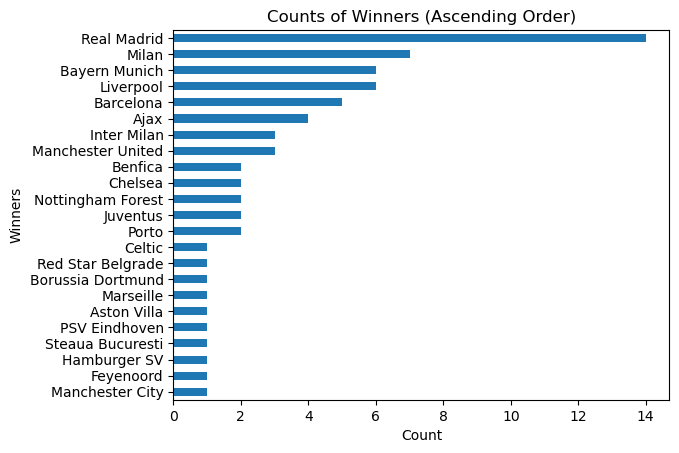

In [4]:
# Count occurrences of each winner
count_by_winners = df1['Winners'].value_counts()

# Sort the counts in ascending order
count_by_winners_sorted = count_by_winners.sort_values(ascending=True)

# Plotting the counts in a bar plot
count_by_winners_sorted.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Winners')
plt.title('Counts of Winners (Ascending Order)')
plt.show()

Text(0.5, 1.0, 'Count of Winners')

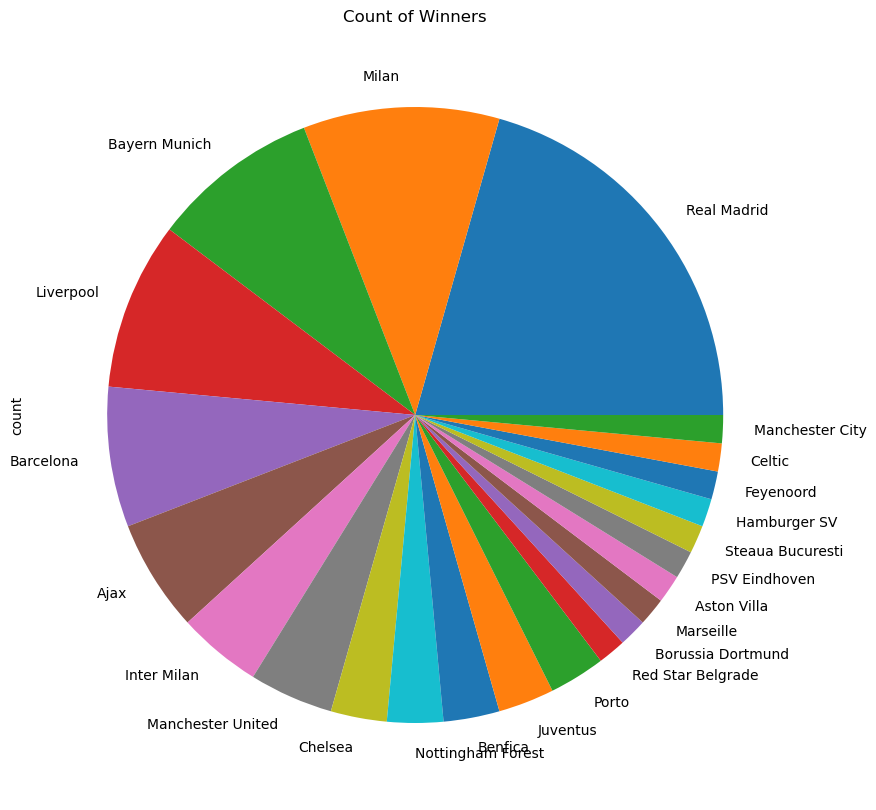

In [5]:
count_by_winners.plot.pie(figsize=(10,10))

plt.title('Count of Winners')

In [6]:
#I will start with the second dataframe
table_2 = soup.find_all('table')[7]
#I copied this table's content into a notepad and saved it in order to avoid clutter on the code.

In [7]:
# Read the HTML table
table_2_read = pd.read_html("C:/Users/jscamale/Desktop/Pandas projects/table_2.html")

df2 = table_2_read[0]

print(df2)

           Nation  Titles  Runners-up  Total
0           Spain      19          11     30
1         England      15          11     26
2           Italy      12          17     29
3      Germany[a]       8          10     18
4     Netherlands       6           2      8
5        Portugal       4           5      9
6          France       1           6      7
7         Romania       1           1      2
8        Scotland       1           1      2
9   Yugoslavia[b]       1           1      2
10        Belgium       0           1      1
11         Greece       0           1      1
12         Sweden       0           1      1


In [8]:
#cleaning the data on the table
df2['Nation'] = df2['Nation'].str.replace('[a]', '')
df2['Nation'] = df2['Nation'].str.replace('[b]', '')
df2

,Nation,Titles,Runners-up,Total
0,Spain,19,11,30
1,England,15,11,26
2,Italy,12,17,29
3,Germany,8,10,18
4,Netherlands,6,2,8
5,Portugal,4,5,9
6,France,1,6,7
7,Romania,1,1,2
8,Scotland,1,1,2
9,Yugoslavia,1,1,2


In [9]:
#Creating the right index
df2 = df2.set_index(['Nation'])

Text(0.5, 0, 'Number of Titles')

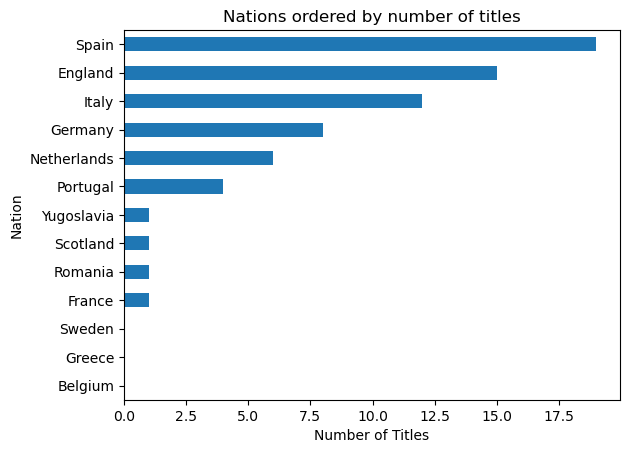

In [10]:
#Organize and Visualize
Country_order = df2['Titles'].sort_values()
Country_order.plot(kind='barh')
plt.title('Nations ordered by number of titles')
plt.xlabel('Number of Titles')

Text(0.5, 0, 'Number of Runner-ups')

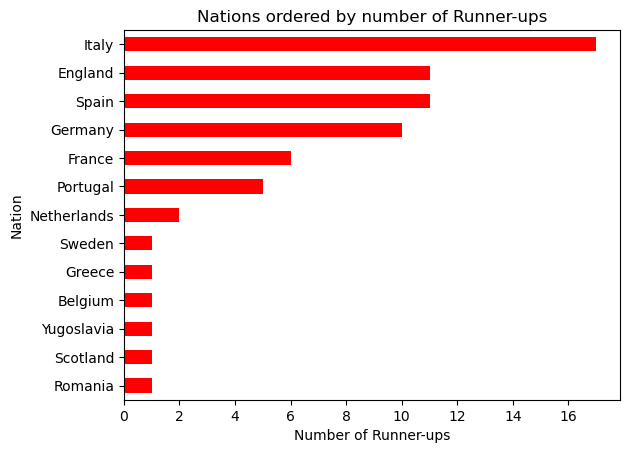

In [11]:
df2['Runners-up'].sort_values().plot(kind='barh', color='red')
plt.title('Nations ordered by number of Runner-ups')
plt.xlabel('Number of Runner-ups')

Text(0.5, 0, 'Number of titles + runner-ups')

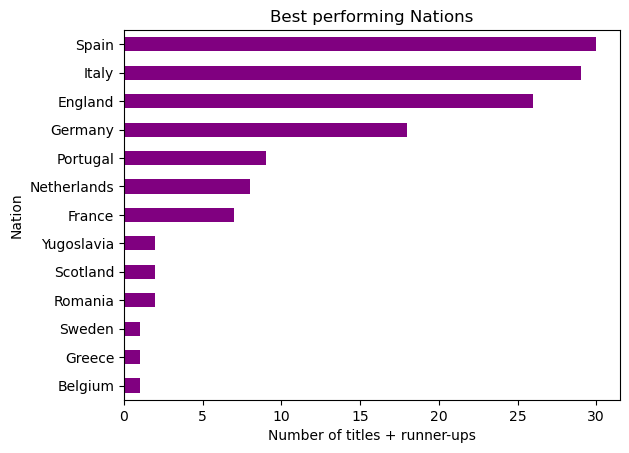

In [12]:
df2['Total'].sort_values().plot(kind='barh', color='purple')
plt.title('Best performing Nations')
plt.xlabel('Number of titles + runner-ups')

Text(0, 0.5, '')

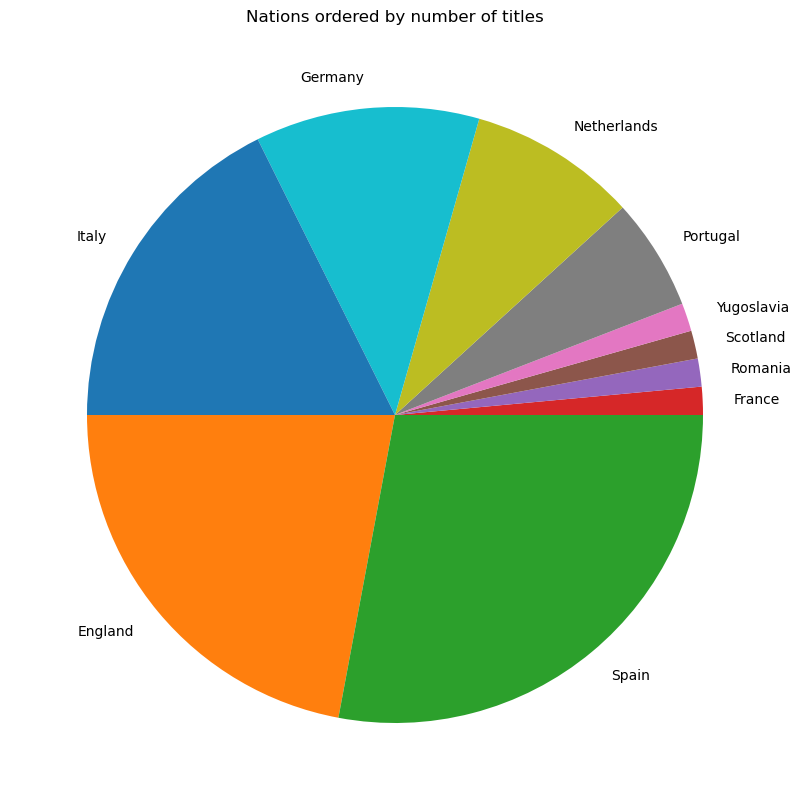

In [13]:
Country_order.plot.pie(figsize=(10,10))
plt.title('Nations ordered by number of titles')
plt.xlabel('')
plt.ylabel('')